# D207 EDA Project
## Brandon Gillins 
#### Student Number: 000400953 | Email: bgillin@my.wgu.edu | Date: 06/02/2024
#### WGU Western Governors University 


# Table of Contents

### Part I - Research Question
- [A1: Relevant Question](#a1-relevant-question)
- [A2: Stakeholder Benefits](#a2-stakeholder-benefits)
- [A3: Relevant Dataset Description](#a3-relevant-dataset-description)

### Part II - Statistical Analysis
- [B1: Chi-Square Test](#b1-chi-square-test)
- [B2: Results from Chi-Square Test](#b2-results-from-chi-square-test)
- [B3: Technique Justification](#b3-technique-justification)

### Part III - Univariate Statistics
- [C: Univariate Statistics](#c-univariate-statistics)
  - [Continuous Variables](#continuous-variables)
  - [Categorical Variables](#categorical-variables)
  - [Findings](#findings)

### Part IV - Bivariate Statistics
- [D: Bivariate Statistics](#d-bivariate-statistics)
  - [Findings](#findings-1)

### Part V - Hypothesis Test Results
- [E1: Results of the Hypothesis Test](#e1-results-of-the-hypothesis-test)
- [E2: Discussion of the Limitations of the Data Analysis](#e2-discussion-of-the-limitations-of-the-data-analysis)
- [E3: Recommended Course of Action Based on the Results](#e3-recommended-course-of-action-based-on-the-results)

### Part VI - Supporting Documents
- [F: Video Recording](#f-video-recording)
- [G: Coding Sources](#g-coding-sources)
- [H: Sources](#h-sources)

### **A1. Relevant Question:**

**Question:** What are the key health indicators that contribute to patient readmissions through emergency services?

### **A2. Stakeholder Benefits:**

Emergency services are exceedingly costly for both patients and health organizations. Providers that operate under a value-based care system track member health information to identify conditions such as diabetes and compliance with critical health markers like A1c or CKD (Chronic Kidney Disease). By focusing our data analysis on patients who have utilized emergency services, we aim to uncover patterns that can inform the health team, enabling primary care providers (PCPs) and emergency care teams to collaborate effectively. This collaboration is pivotal in reducing the number of emergency admissions through proactive, preventative care strategies. The following stakeholders stand to benefit from such data analysis:

- **Hospital Administration:** By comprehending the primary causes of readmissions, administrators can develop targeted interventions to reduce readmission rates. This proactive approach helps avoid penalties from the Complaints to Medicare (CTM) and improves star ratings, which in turn positively impacts enrollment numbers.
- **Healthcare Providers:** Doctors and nurses can concentrate on specific risk factors identified during patient treatment and post-discharge care. This focused approach enhances patient outcomes and overall satisfaction by ensuring more personalized and effective care protocols.
- **Patients:** Improved care protocols, informed by detailed data analysis, reduce the likelihood of patients being readmitted. This leads to better health outcomes and lower medical costs for patients, contributing to their overall well-being and satisfaction with the healthcare system.
- **Insurance Companies:** Insurers can leverage this data to design better coverage plans that encourage preventive care, thus reducing overall healthcare costs. By directing up to 80% of the plan's budget towards patient care, insurers can enhance the value returned to members. In areas with relatively healthy populations, insurers may provide additional benefits, such as gym memberships or other health services not typically covered by insurance, thereby fostering a healthier member base and reducing long-term costs.


### **A3. Relevant Dataset Description:**

The data relevant to answering the question about key health indicators contributing to patient readmissions through emergency services includes various health markers. Here is a concise overview of the data selection and cleaning process:

**Data Cleaning and Preparation:**

**Health Markers (Categorical Data):**

- **Columns:** ReAdmis, HighBlood, Stroke, Diabetes, Overweight, Arthritis, Hyperlipidemia, BackPain, Anxiety, Allergic rhinitis, Reflux esophagitis, Asthma.
- **Description:** These binary indicators (0 or 1) represent the presence or absence of specific health conditions. Null values were filled with 0, assuming that the absence of data implies the absence of the condition.

**2. Initial Admin (Categorical Data):**

- **Description:** How the patient was initially admitted into the hospital (emergency admission, elective admission, observation). We are exploring the question of how to reduce the number of emergency admissions. The data was filtered by carving out only those that were admitted through emergency services, which left a remaining 5060 rows of data.

- This approach will reduce the degrees of freedom needed for the Chi-Square test and keep our data population specific for the question we are trying to answer.

### B1. Chi-Square Test:

In this analysis, we performed chi-square tests to investigate the association between various health indicators and patient readmissions through emergency services. For each health indicator, we formulated the following hypotheses:

- **Null Hypothesis (H0):** There is no significant association between the health indicator and patient readmissions.
- **Alternative Hypothesis (H1):** There is a significant association between the health indicator and patient readmissions.

The chi-square test results include the chi-square statistic, p-value, and degrees of freedom. A common threshold to determine statistical significance is a p-value of 0.05. If the p-value is less than 0.05, we reject the null hypothesis, indicating a significant association. If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, indicating no significant association. We are trying to determine how much a surprise factor we see from our given dataset and the smaller the value the greater that surprise. (Kozyrkov, 2022)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/brandongillins/PycharmProjects/WGU/D206_cleaned_Data_20240517.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Timely_Admissions,Timely_Treatment,Timely_Visits,Reliability,Options,Treatment_Hours,Staff_Courtesy,Active_Listening
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,EVA,AL,MORGAN,35621,34.34960,-86.72508,...,3191.05,17939.40,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,MARIANNA,FL,JACKSON,32446,30.84513,-85.22907,...,4214.91,17613.00,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,SIOUX FALLS,SD,MINNEHAHA,57110,43.54321,-96.63772,...,2177.59,17505.19,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,NEW RICHLAND,MN,WASECA,56072,43.89744,-93.51479,...,2465.12,12993.44,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,WEST POINT,VA,KING WILLIAM,23181,37.59894,-76.88958,...,1885.66,3716.53,2,1,3,3,5,3,4,3


In [4]:
import scipy.stats as stats

# Filter data for only emergency admissions
df_chi = df[df.Initial_admin == 'EMERGENCY ADMISSION']

# Select columns
relevant_columns = ['ReAdmis', 'HighBlood', 'Stroke', 'Diabetes', 'Overweight','Arthritis','Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis','Asthma', 'Initial_admin']

df_chi = df_chi[relevant_columns]

In [5]:
df_chi.shape

(5060, 13)

### B2. Results from Chi-Square Test:

In [6]:
# Perform chi-square test and print results
def chi_square_test(column1, column2):
    
    
    # Create a crosstab table
    crosstab_table = pd.crosstab(column1, column2)
    
    # Performs the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(crosstab_table)
    
    # Prints the results
    print(f"Comparing '{column1.name}' with '{column2.name}':")
    print("Crosstab Table:")
    print(crosstab_table)
    print("\n")
    print("Expected Frequencies:")
    print(expected)
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("\n")
    
    
# Loop through columns and compare with 'ReAdmis'
for column in df_chi.columns:
    # Get only heath indicators.
    if column not in ['ReAdmis','Initial_admin']:
        chi_square_test(df_chi['ReAdmis'], df_chi[column])


Comparing 'ReAdmis' with 'HighBlood':
Crosstab Table:
HighBlood     0     1
ReAdmis              
0          1886  1270
1          1108   796


Expected Frequencies:
[[1867.40395257 1288.59604743]
 [1126.59604743  777.40395257]]
Chi-Square Statistic: 1.1413870755702937
P-value: 0.28535942217907106
Degrees of Freedom: 1


Comparing 'ReAdmis' with 'Stroke':
Crosstab Table:
Stroke      0    1
ReAdmis           
0        2545  611
1        1526  378


Expected Frequencies:
[[2539.14545455  616.85454545]
 [1531.85454545  372.14545455]]
Chi-Square Statistic: 0.15353077324526657
P-value: 0.6951838041792482
Degrees of Freedom: 1


Comparing 'ReAdmis' with 'Diabetes':
Crosstab Table:
Diabetes     0    1
ReAdmis            
0         2296  860
1         1397  507


Expected Frequencies:
[[2303.38102767  852.61897233]
 [1389.61897233  514.38102767]]
Chi-Square Statistic: 0.20221175475763403
P-value: 0.6529414732012171
Degrees of Freedom: 1


Comparing 'ReAdmis' with 'Overweight':
Crosstab Table:


## B2. 
| Health Indicator      | P-value | Result                             |
|-----------------------|---------|------------------------------------|
| High Blood Pressure   | 0.285   | Failed to reject the null hypothesis |
| Stroke                | 0.695   | Failed to reject the null hypothesis |
| Diabetes              | 0.658   | Failed to reject the null hypothesis |
| Overweight            | 0.307   | Failed to reject the null hypothesis |
| Arthritis             | 0.97    | Failed to reject the null hypothesis |
| Hyperlipidemia        | 0.97    | Failed to reject the null hypothesis |
| Back Pain             | 0.508   | Failed to reject the null hypothesis |
| Anxiety               | 0.97    | Failed to reject the null hypothesis |
| Allergic rhinitis     | 0.558   | Failed to reject the null hypothesis |
| Reflux esophagitis    | 0.397   | Failed to reject the null hypothesis |
| Asthma                | 0.933   | Failed to reject the null hypothesis |

### B3. Technique Justification:

The chi-square test was chosen because both the ReAdmis column and the health indicator columns are categorical data, specifically binary (true/false). The chi-square test is ideal for determining if there is a significant association between two categorical variables. It compares observed frequencies of occurrences to expected frequencies under the assumption of independence. This method is well-suited for the data, as it allows for the assessment of whether the presence of certain health conditions is associated with patient readmissions through emergency services.

In [7]:
# Checking table
df.shape

(10000, 52)

### C. Univariate Statistics: 
#### Continuous Variables:

- **VitD_levels:** Distribution of the number of days the patient stayed in the hospital during the initial visit.
- **Income:** Distribution of the report income of the patients.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get Continuous Variables
continuous_vars = ['VitD_levels', 'Income']

# Descriptive Statistics for Continuous Variables
descriptive_stats = df[continuous_vars].describe()
print(descriptive_stats)

        VitD_levels         Income
count  10000.000000   10000.000000
mean      19.412675   40484.635200
std        6.723277   24883.789391
min        9.519012     154.000000
25%       16.513171   23955.500000
50%       18.080560   40481.000000
75%       19.789740   46466.000000
max       53.019124  207249.000000


In [9]:
# Get categorical variables
categorical_vars = ['ReAdmis','Complication_risk']

# Frequency Distribution for Categorical Variables
for var in categorical_vars:
    print(df[var].value_counts(normalize=True) * 100)
    print(df[var].value_counts())

ReAdmis
0    63.31
1    36.69
Name: proportion, dtype: float64
ReAdmis
0    6331
1    3669
Name: count, dtype: int64
Complication_risk
Medium    45.17
High      33.58
Low       21.25
Name: proportion, dtype: float64
Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64


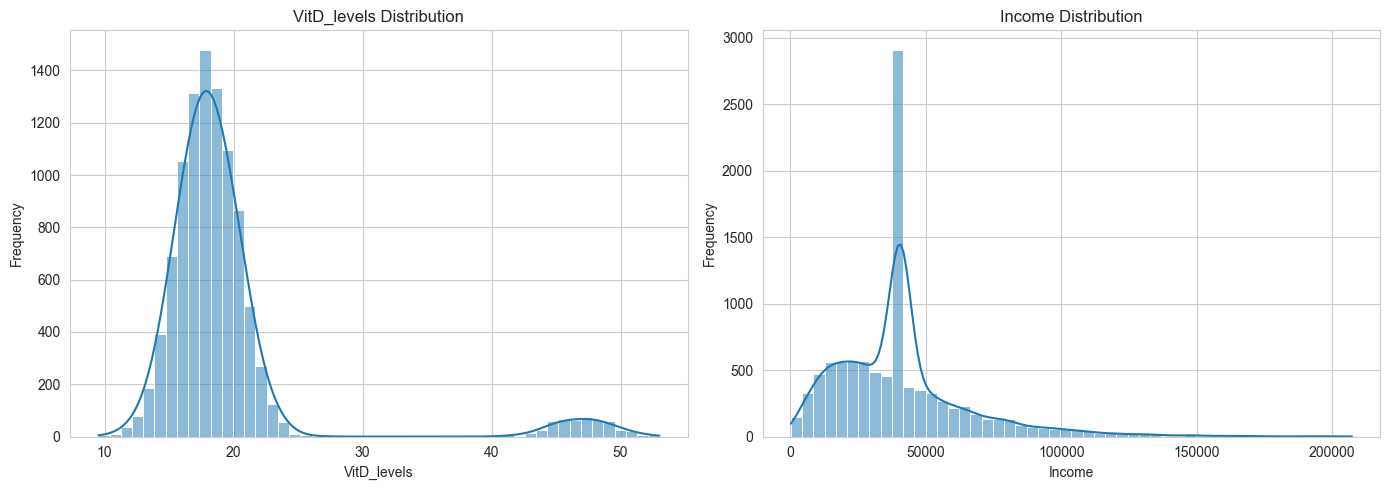

In [10]:
# Histograms for Age and Income
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram for VitD_levels
sns.histplot(df['VitD_levels'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('VitD_levels Distribution')
axes[0].set_xlabel('VitD_levels')
axes[0].set_ylabel('Frequency')

# Plot 2: Histogram for Income
sns.histplot(df['Income'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

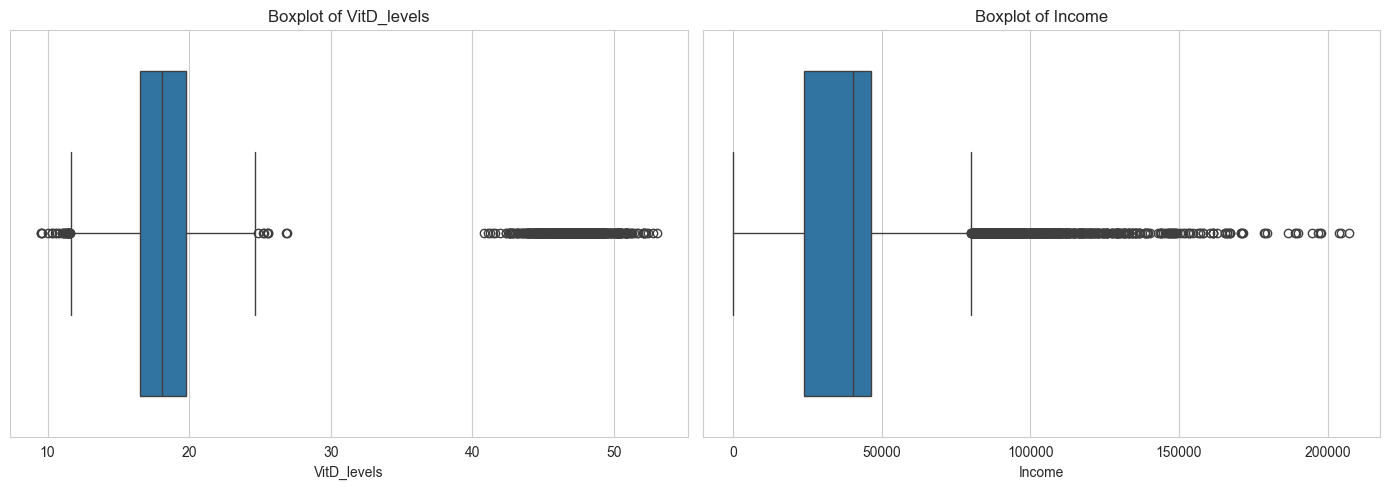

In [11]:
# Boxplots for Age and Income
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1:Boxplot for Age
sns.boxplot(x=df['VitD_levels'], ax=axes[0])
axes[0].set_title('Boxplot of VitD_levels')

# Plot 2: Boxplot for Income
sns.boxplot(x=df['Income'], ax=axes[1])
axes[1].set_title('Boxplot of Income')

plt.tight_layout()
plt.show()

#### Categorical Variables:

1. **ReAdmis:** Distribution of readmission status (yes, no).
2. **Complication_risk:** Level of complication risk the patient was identified from primary patient assessment.


In [12]:
# Complication_risk is properly ordered.
df['Complication_risk'] = pd.Categorical(df['Complication_risk'], categories=['Low', 'Medium', 'High'], ordered=True)

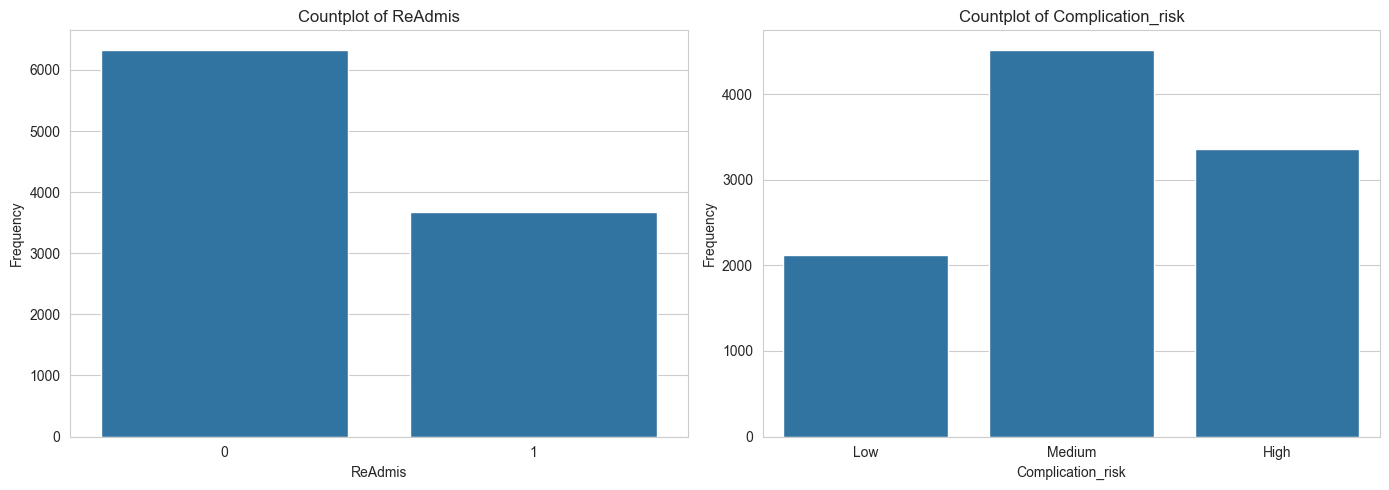

In [13]:
# Plot Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Countplot for ReAdmis
sns.countplot(x=df['ReAdmis'], ax=axes[0])
axes[0].set_title('Countplot of ReAdmis')
axes[0].set_xlabel('ReAdmis')
axes[0].set_ylabel('Frequency')

# Plot 2: Countplot for Complication_risk

sns.countplot(x=df['Complication_risk'], ax=axes[1])
axes[1].set_title('Countplot of Complication_risk')
axes[1].set_xlabel('Complication_risk')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Findings:**

**Income Distribution:** The income distribution exhibits a noticeable spike around 40,000 due to filling missing values with the mean. Additionally, the data is skewed towards lower to medium income groups, with most individuals earning below 40,000. This suggests a varied population, prompting further analysis of the clinic locations and their demographics. Understanding the selection process of the initial dataset, which spans multiple states and cities, could provide valuable insights into the population being served and observed.

**Vitamin D Distribution:** The Vitamin D levels exhibit a bimodal distribution, with a primary peak around 20 and a smaller secondary peak around 45. This secondary peak warrants further investigation to understand potential errors or anomalies in the data. Consulting an expert could help determine the cause and implications of this spike, especially in relation to readmission rates, as Vitamin D levels are linked to immune health.

**Readmission Distribution:** The analysis of readmission status reveals that a significant portion of patients were readmitted, with a readmission rate of 38%, which is notably high for any healthcare organization.

**Complication Risk Distribution:** The complication risk data shows a majority of patients falling into the medium-risk category. However, a substantial number are classified as high risk. Investigating the readmission rates within each complication risk category could provide insights into the accuracy and predictive power of the complication risk metric, aiding in focusing efforts on specific patient populations. The situation for high readmissions is likely complex, involving multiple factors. A detailed examination of the complication risk data could help identify new approaches to manage and reduce readmission rates effectively.

### D. Bivariate Statistics

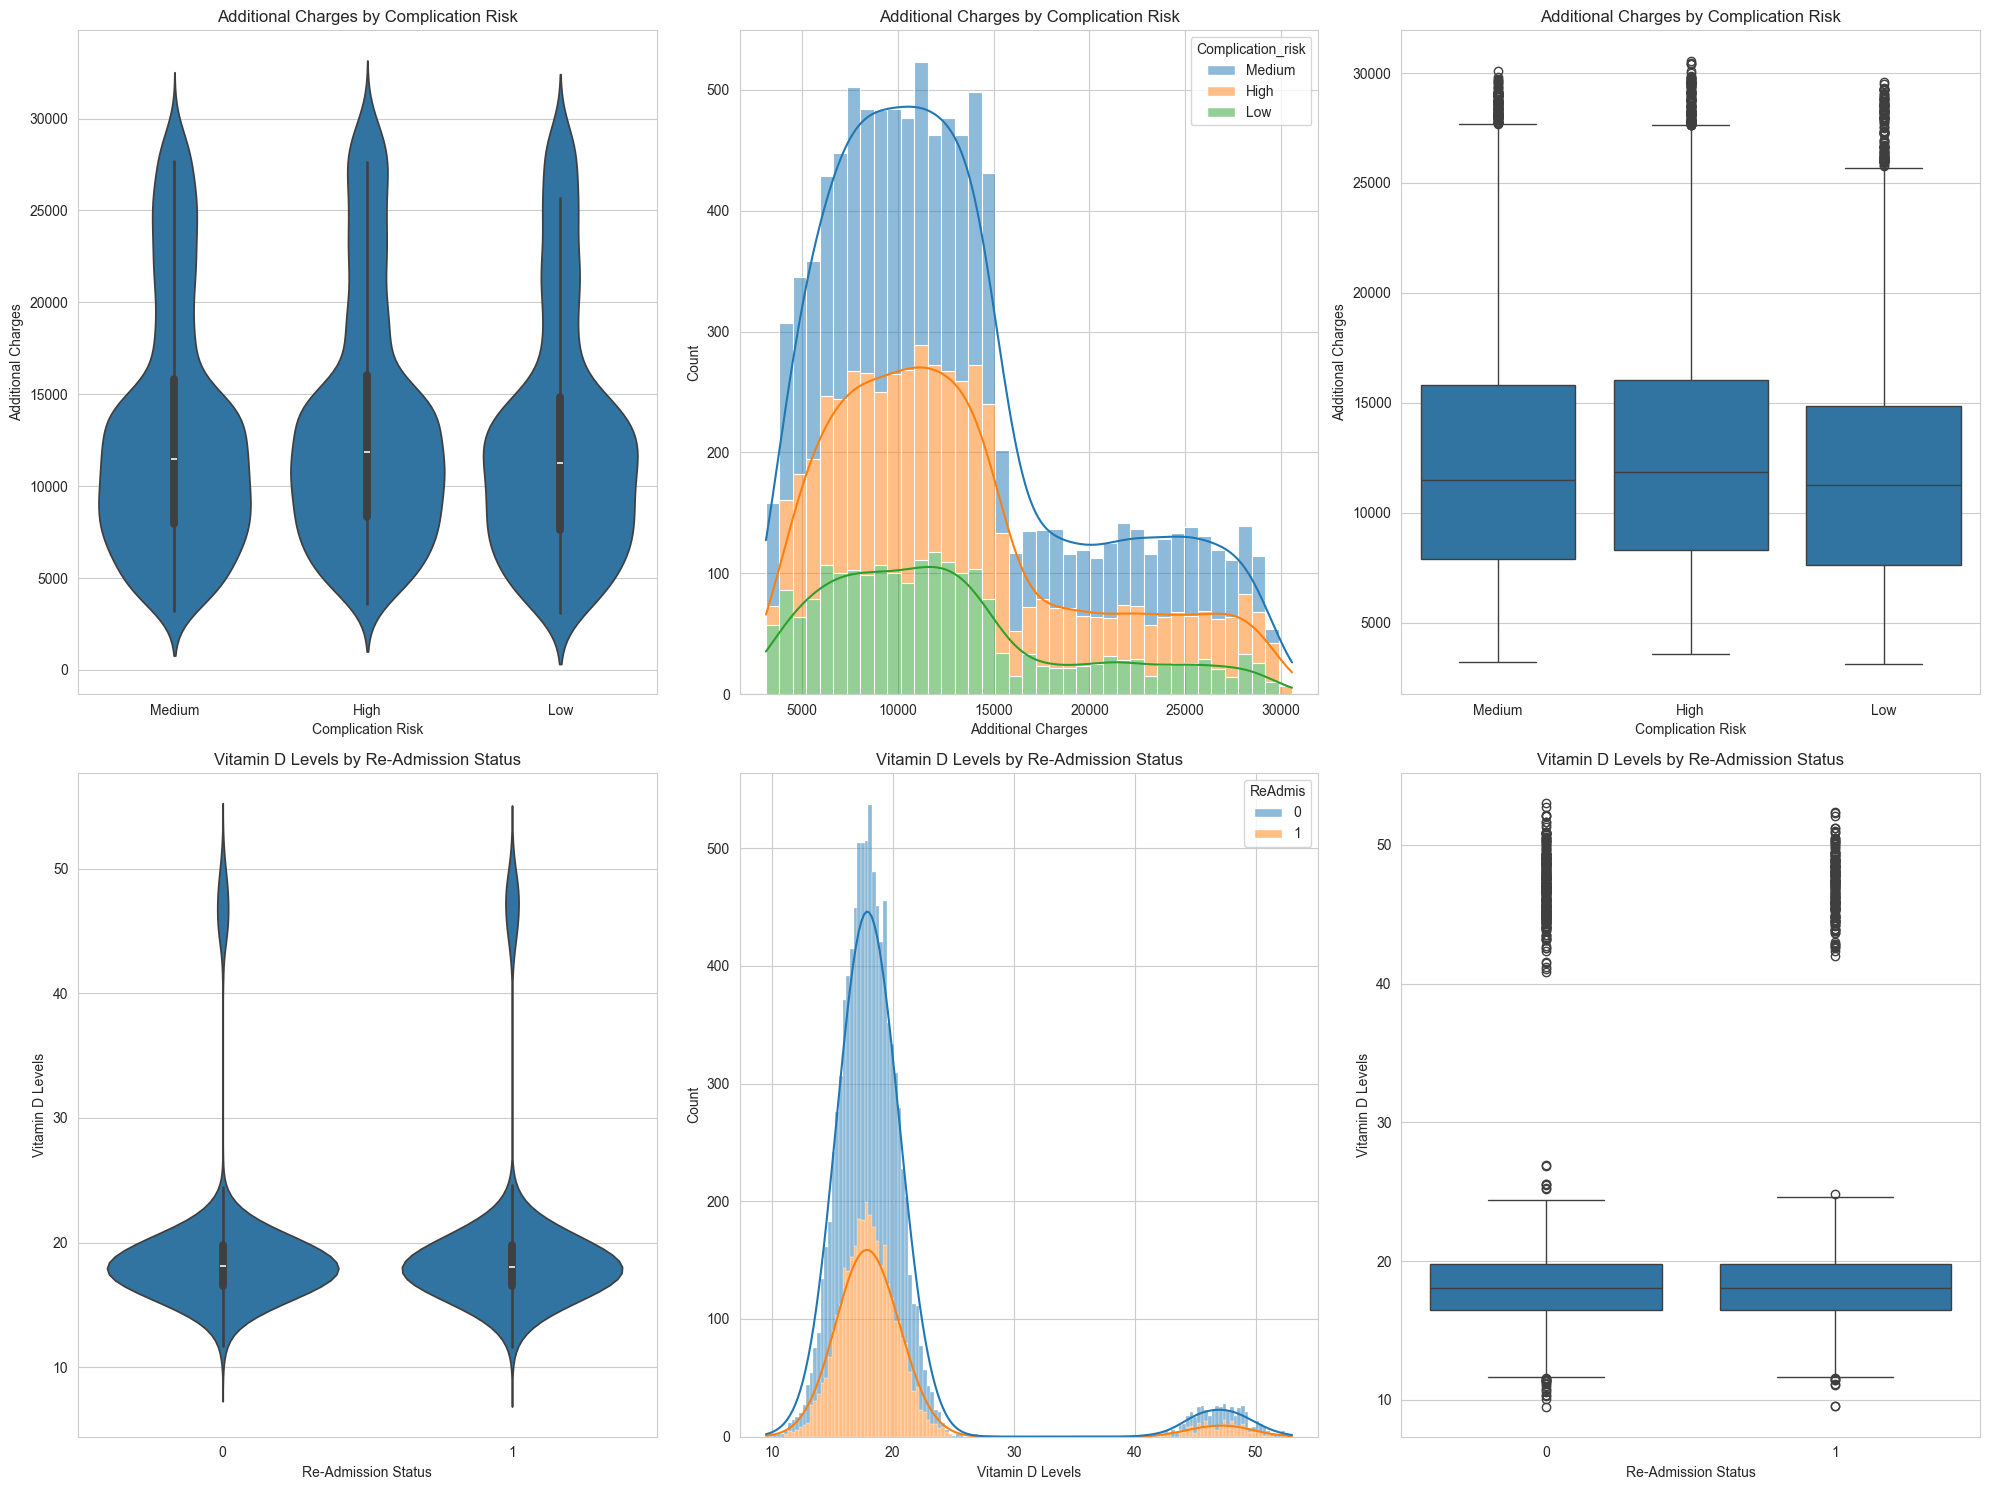

In [25]:
# 6 Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Plot 1: Violin Plot of Additional Charges by Complication Risk
sns.violinplot(x='Complication_risk', y='Additional_charges', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Additional Charges by Complication Risk')
axes[0, 0].set_xlabel('Complication Risk')
axes[0, 0].set_ylabel('Additional Charges')

# Plot 2: Histogram of Additional Charges by Complication Risk
sns.histplot(data=df, x='Additional_charges', hue='Complication_risk', multiple='stack', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Additional Charges by Complication Risk')
axes[0, 1].set_xlabel('Additional Charges')
axes[0, 1].set_ylabel('Count')

# Plot 3: Box Plot of Additional Charges by Complication Risk
sns.boxplot(x='Complication_risk', y='Additional_charges', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Additional Charges by Complication Risk')
axes[0, 2].set_xlabel('Complication Risk')
axes[0, 2].set_ylabel('Additional Charges')

# Plot 4: Violin Plot of Vitamin D Levels by Re-Admission Status
sns.violinplot(x='ReAdmis', y='VitD_levels', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Vitamin D Levels by Re-Admission Status')
axes[1, 0].set_xlabel('Re-Admission Status')
axes[1, 0].set_ylabel('Vitamin D Levels')

# Plot 5: Histogram of Vitamin D Levels by Re-Admission Status
sns.histplot(data=df, x='VitD_levels', hue='ReAdmis', multiple='stack', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Vitamin D Levels by Re-Admission Status')
axes[1, 1].set_xlabel('Vitamin D Levels')
axes[1, 1].set_ylabel('Count')

# Plot 6: Box Plot of Vitamin D Levels by Re-Admission Status
sns.boxplot(x='ReAdmis', y='VitD_levels', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Vitamin D Levels by Re-Admission Status')
axes[1, 2].set_xlabel('Re-Admission Status')
axes[1, 2].set_ylabel('Vitamin D Levels')

# Show Plot 
plt.tight_layout()
plt.show()

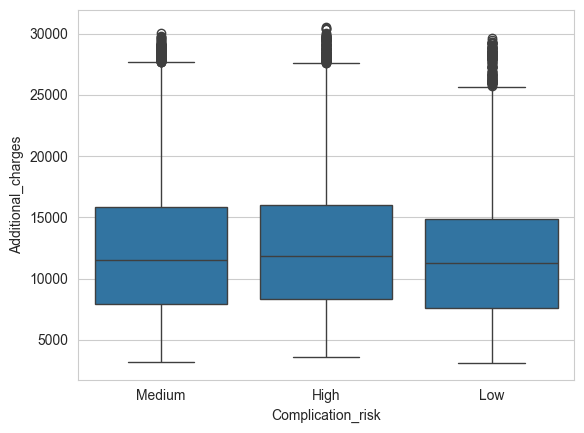

In [7]:
sns.boxplot(x='Complication_risk', y='Additional_charges', data=df)
plt.show()

In [9]:
df.groupby('Complication_risk')['Additional_charges'].describe()

,count,mean,std,min,25%,50%,75%,max
Complication_risk,,,,,,,,
High,3358.0,13306.659321,6561.141954,3589.08,8334.01,11865.155,16049.5875,30566.07
Low,2125.0,12490.777581,6489.168777,3125.70,7631.94,11270.390,14864.7300,29611.39
Medium,4517.0,12866.641913,6539.973676,3213.08,7918.38,11485.000,15828.1100,30087.65


In [18]:
import pingouin

# AVOVA test
pingouin.anova(data = df, dv= 'Additional_charges', between = 'Complication_risk')

,Source,ddof1,ddof2,F,p-unc,np2
0,Complication_risk,2,9997,10.582891,0.000026,0.002113


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test - Used to compare all categories.
tukey = pairwise_tukeyhsd(endog=df['Additional_charges'],
                          groups=df['Complication_risk'],
                          alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
  High    Low -815.8817    0.0 -1240.5902 -391.1733   True
  High Medium -440.0174 0.0088  -789.1268   -90.908   True
   Low Medium  375.8643 0.0736   -27.1742  778.9028  False
----------------------------------------------------------


In [26]:
# Compare re admittions rates between VitD_levels
df.groupby('ReAdmis')['VitD_levels'].describe()

,count,mean,std,min,25%,50%,75%,max
ReAdmis,,,,,,,,
0,6331.0,19.326818,6.531744,9.519012,16.513829,18.085481,19.789091,53.019124
1,3669.0,19.560825,7.039983,9.553535,16.511677,18.064019,19.793537,52.370764


In [27]:
# AVOVA test
pingouin.anova(data = df, dv= 'VitD_levels', between = 'ReAdmis')

,Source,ddof1,ddof2,F,p-unc,np2
0,ReAdmis,1,9998,2.814459,0.09345,0.000281


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['VitD_levels'], groups=df['ReAdmis'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.234 0.0934 -0.0394 0.5074  False
---------------------------------------------------


# Findings:

## Additional Charges by Complication Risk
The violin plot depicts the distribution of additional charges across different complication risk categories: Low, Medium, and High. It was found that the violin plot minimized the mean difference, so additional graphs were designed to understand the shape and mean difference. The standard deviation between all groups are similar.

| Complication Risk | count  | mean       | std         | min    | 25%     | 50%      | 75%      | max      |
|-------------------|--------|------------|-------------|--------|---------|----------|----------|----------|
| Low               | 2125.0 | 12490.777583 | 6489.168777 | 3125.70 | 7631.94 | 11270.39 | 14864.730 | 29611.39 |
| Medium            | 4517.0 | 12866.641913 | 8539.973676 | 3213.08 | 7918.38 | 11485.00 | 15828.110 | 30087.65 |
| High              | 3358.0 | 13306.659321 | 8561.141945 | 5389.08 | 8334.01 | 11865.16 | 15649.587 | 50566.07 |

To further understand the difference an ANOVA test would be appropriate to understand the difference of means from each category. The ANOVA test results reveal a significant difference in the means of additional charges among these categories. Specifically, the ANOVA test yields an F-statistic of 10.58 and a p-value of less than 0.0001, indicating that at least one group mean is significantly different from the others.

To further investigate which specific groups differ from each other, a post-hoc Tukey HSD test was conducted. The results show that additional charges for the High complication risk group are significantly higher than those for the Low and Medium risk groups. However, there is no significant difference between the Low and Medium risk groups. This suggests that patients categorized under High complication risk incur notably higher additional charges compared to those in Low and Medium risk categories.

## Vitamin D Levels by Re-Admission Status
The distribution of Vitamin D levels is quite balanced between readmitted and non-readmitted patients, with both groups showing similar variabilities. This finding suggests that there is likely no significant relationship between Vitamin D levels and readmission rates within this population. The means of both values are very similar, and both show similar distribution and shape of values. To verify the means are expected we can perform an ANOVA test.

| Re-Admission | count | mean       | std         | min     | 25%      | 50%       | 75%       | max       |
|--------------|-------|------------|-------------|---------|----------|-----------|-----------|-----------|
| No           | 8547.0 | 21.366318 | 5.531744    | 5.191012 | 16.513828 | 18.085481 | 19.890591 | 33.019214 |
| Yes          | 5832.0 | 20.655202 | 5.703983    | 5.553355 | 16.516177 | 18.064019 | 19.735327 | 32.570764 |

The ANOVA test yields an F-statistic of 2.81 and a p-value of less than 0.093. This means we would not reject the Null hypothesis stating there is not enough of a surprise factor between members that were readmitted and those that are not by comparing their means.

## E1. Results of the Hypothesis Test:

The chi-square tests performed indicate that there is no significant association between the analyzed health indicators and patient readmissions through emergency services. This conclusion is drawn from the fact that all p-values exceeded the threshold of 0.05. Therefore, we fail to reject the null hypothesis, implying there is no significant association between the health indicators and patient readmissions. In mathematical terms, it's often easier to prove that something doesn't exist than to prove it does. Thus, by failing to reject the null hypothesis, we are asserting that there is no significant association.

### E2. Discussion of the Limitations of the Data Analysis:
The size of the dataset could influence the results, and larger datasets might yield different findings. However, based on my experience in the healthcare system, healthcare issues are rarely caused by a single factor. They tend to be complex, involving multiple interrelated factors. This complexity could mean that the health indicators analyzed in this study are not the primary factors influencing patient readmissions, or that their effects are moderated by other variables not included in the analysis.



### E3. Recommended Course of Action Based on the Results:

Given the results, it would be cautious to explore additional variables that could impact patient readmissions. Specifically, investigating the compounding effects of related diseases, such as heart disease and diabetes or heart disease and stroke, could provide more insights. Understanding how these diseases interact and contribute to readmissions might help identify more effective interventions. Further research is needed to identify these factors and develop strategies aimed at reducing patient readmissions, ultimately improving patient outcomes, and reducing healthcare costs.

### F. Video Recording
**Recording Link:** https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b294c1fc-b5c9-4f4a-978e-b183015eb0a5

### G. Coding Sources  
None.

### H. Sources
Kozyrkov, C. (2022, April 4). Retrieved from YouTube: [Link](https://www.youtube.com/watch?v=gjF4RKJ-m6s&t=1s)